# Classification Examples

In [1]:
# widen the screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

# change the path and loading class
import os, sys
import pandas as pd
import numpy as np
import seaborn as sns
module_path = os.path.abspath(os.path.join("../"))
if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from slickml.classification import XGBoostCVClassifier

# XGBoostCVClassifier

## Example 1

In [3]:
# loading data
df = pd.read_csv("../data/dummy_data.csv")
df.head()

,F1,F2,F3,F4,F5,F6,CLASS
0,5.7,4.7,3.7,58.0,249.30,456.47,0
1,7.7,6.6,4.1,20.0,260.92,443.43,1
2,6.2,4.3,4.6,59.0,255.63,478.96,1
3,5.7,4.4,3.8,49.0,195.28,381.94,0
4,9.1,4.7,4.6,17.0,259.55,395.67,1


In [4]:
# define X, y
y = df.CLASS.values
X = df.drop(["CLASS"], axis=1)

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    shuffle=True,
                                                    stratify=y,
                                                    random_state=1367)

In [6]:
# setup feature selector object
params={"eval_metric" : "auc",
        "learning_rate" : 0.05,
        "max_depth": 2,
        "min_child_weight" : 1,
        "gamma" : 0.0}

clf = XGBoostCVClassifier(num_boost_round=500,
                          n_splits=4,
                          metrics=("logloss"),
                          params=params)
clf.fit(X_train, y_train)

*-* Best Boosting Round = 191 -*- 4-Folds CV LOGLOSS: Train = 0.232 +/- 0.008 -*- Test = 0.320 +/- 0.025 *-*


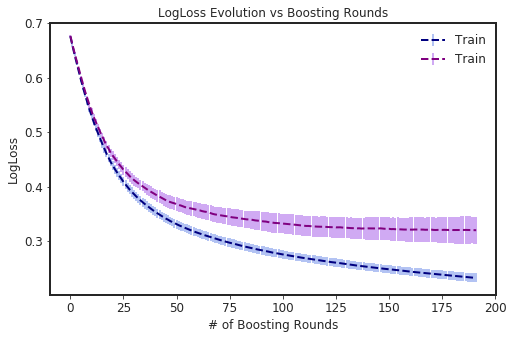

In [7]:
clf.plot_cv_results()

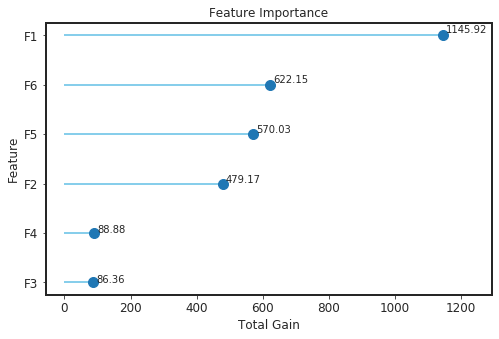

In [8]:
clf.plot_feature_importance()

In [9]:
# predic proba (or clf.predict_proba_)
pred_proba = clf.predict_proba(X_test, y_test)
pred_proba[:10]

array([0.6872404 , 0.6437372 , 0.9898107 , 0.91745585, 0.8029401 ,
       0.79498386, 0.6696425 , 0.9213432 , 0.9763105 , 0.9957327 ],
      dtype=float32)

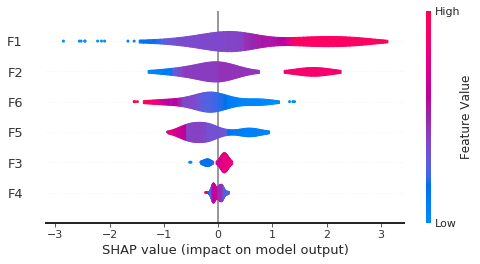

In [10]:
clf.plot_shap_summary(plot_type="violin")

In [12]:
clf.shap_values_test_[:10]

array([[-1.17578661e+00, -5.86567044e-01,  2.24011347e-01,
         1.57289244e-02,  5.16849458e-01,  1.82012349e-01],
       [ 2.63391405e-01, -6.70697689e-01, -3.13290775e-01,
        -2.99329627e-02, -1.77391380e-01, -9.14573073e-02],
       [ 1.92844176e+00,  1.65123546e+00,  6.71078265e-02,
        -1.91674568e-04, -4.64400291e-01, -2.17012703e-01],
       [ 1.73300028e+00,  5.55277169e-02,  7.87695572e-02,
         7.93843195e-02, -5.03318131e-01, -6.46094084e-01],
       [-8.95560607e-02, -1.23228216e+00, -3.07602823e-01,
        -7.56613836e-02,  5.68822742e-01,  9.30051088e-01],
       [ 2.82156050e-01, -1.97538398e-02, -2.15325534e-01,
         6.93768915e-03, -1.98684931e-01, -1.11096114e-01],
       [ 2.41128638e-01, -9.37509894e-01,  1.55264497e-01,
        -3.11029796e-03, -2.40322769e-01, -1.19882606e-01],
       [ 3.48925084e-01,  6.94350719e-01,  7.06390738e-02,
         5.83638158e-03, -1.72579139e-01, -9.74345058e-02],
       [ 2.96836704e-01,  1.69714773e+00,  1.374

In [13]:
clf.shap_values_train_[:10]

array([[ 1.6810727 ,  1.8670248 , -0.12494415, -0.11206084, -0.5291322 ,
        -0.4470591 ],
       [ 0.20235999, -0.23255867,  0.05476505,  0.06951104, -0.21339028,
        -0.4764193 ],
       [ 0.15221135, -1.1012809 , -0.32120004,  0.01052977,  0.04009805,
         0.23228301],
       [ 2.3585417 ,  1.646324  ,  0.06655529, -0.08806157, -0.11101343,
         0.0118833 ],
       [ 2.3252146 ,  0.07344273,  0.06707823,  0.1696119 , -0.47139165,
        -1.3900161 ],
       [ 1.6970465 ,  1.8670248 , -0.12494415, -0.07160836, -0.5291322 ,
        -0.4470591 ],
       [ 1.6877612 ,  0.63464016,  0.06441025, -0.0825933 , -0.2945922 ,
        -0.23303552],
       [ 0.25127745,  0.03300017,  0.15304364, -0.10549548, -0.1993008 ,
         0.8770816 ],
       [ 0.12158564, -0.06782506,  0.08321874,  0.01529711,  0.55117816,
         0.2280842 ],
       [ 0.18574946, -1.0985618 ,  0.1552645 ,  0.02025529, -0.2360702 ,
        -0.43954518]], dtype=float32)

In [14]:
# cv_results (or clf.cv_results_)
cvr = clf.get_cv_results()
cvr.tail()

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
187,0.233434,0.008174,0.320090,0.025060
188,0.233021,0.008195,0.320024,0.024866
189,0.232621,0.008224,0.320062,0.024701
190,0.232216,0.008193,0.319890,0.024903
191,0.231895,0.008241,0.319651,0.024945


In [15]:
# feature importance (or clf.feature_importance_)
clf.get_feature_importance()

,feature,total_gain
0,F1,1145.921151
1,F6,622.148287
2,F5,570.030153
3,F2,479.170822
4,F4,88.880518
5,F3,86.359118
